In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_file_path = "/content/drive/My Drive/realtor-data.zip.csv"

In [ ]:
df = pd.read_csv(csv_file_path)

In [ ]:
clean_df = df.dropna()
clean_df = clean_df.drop_duplicates()
clean_df.head()

clean_df.shape

(1084909, 12)

In [ ]:
clean_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12


In [ ]:
clean_df['status'].value_counts()
filtered_df = clean_df[clean_df['status']=='sold']

In [ ]:
filtered_df = filtered_df.drop(columns=(['status','street','city','state','prev_sold_date']))

In [ ]:
michigan_df = clean_df[clean_df['state']=='Michigan']

In [ ]:
michigan_df = michigan_df.drop(columns=['state'])
michigan_df.head()


,brokered_by,status,price,bed,bath,acre_lot,street,city,zip_code,house_size,prev_sold_date
691942,98474.0,for_sale,225000.0,3.0,2.0,0.49,1833311.0,Erie,48133.0,1979.0,2014-02-13
692165,22290.0,for_sale,279900.0,5.0,3.0,0.58,1576631.0,Lambertville,48144.0,2802.0,2018-09-19
692168,54172.0,for_sale,204900.0,3.0,2.0,0.32,232520.0,Temperance,48182.0,1599.0,2016-12-05
692258,45825.0,for_sale,229900.0,3.0,2.0,0.44,1027017.0,Lambertville,48144.0,1414.0,2011-08-30
692291,107752.0,for_sale,359900.0,3.0,3.0,0.36,1183141.0,Lambertville,48144.0,1942.0,2012-04-02


In [ ]:
michigan_df = michigan_df.drop(columns=(['street','city','prev_sold_date','status']))


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
michigan_df = michigan_df[(michigan_df['price']>50000) & (michigan_df['price']<1000000)]

In [ ]:
michigan_df = michigan_df.drop(columns=(['brokered_by','zip_code','acre_lot']))


In [ ]:
michigan_df.head()
michigan_df = michigan_df[(michigan_df['house_size']<4000) & (michigan_df['house_size']>500)]

In [ ]:
michigan_df.shape

(13479, 4)

In [ ]:
michigan_df.to_csv('michigan_df.csv')

In [ ]:
#using bed, bath and house_size only, also filtered out homes over a million and under 50,000 this yielded the highest r2 value of .51

X = michigan_df.drop(columns=['price'],axis=1)
y = michigan_df['price']

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df1 = df.head(50)
df1

,Actual,Predicted
1790245,75500.0,97645.879943
761613,140000.0,146860.121680
739162,725000.0,422430.013461
737659,67900.0,101208.866956
736325,350000.0,248362.154235
694768,154000.0,246084.767378
1791822,289900.0,546602.397001
1790884,429900.0,330239.234897
755153,789000.0,486507.398209
758074,239900.0,276933.007532


In [ ]:
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [ ]:
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Calculate naive forecast MAE (assuming previous value is the forecast)
# Shift the series by 1 to get the previous values
y_train_naive = y_train.shift(1).dropna()
y_train_actual = y_train[1:]

y_test_naive = y_test.shift(1).dropna()
y_test_actual = y_test[1:]

train_mae_naive = mean_absolute_error(y_train_actual, y_train_naive)
test_mae_naive = mean_absolute_error(y_test_actual, y_test_naive)

# Calculate MASE
train_mase = train_mae / train_mae_naive
test_mase = test_mae / test_mae_naive

In [ ]:
print(f"Train MASE: {train_mase}")
print(f"Test MASE: {test_mase}")

Train MASE: 0.4785896272433076
Test MASE: 0.4781870398606019


In [ ]:
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training R^2:", train_r2)
print("Testing R^2:", test_r2)

Training RMSE: 118331.64120224185
Testing RMSE: 119239.45131193391
Training R^2: 0.4961813021480721
Testing R^2: 0.4969679133962315


In [ ]:
import matplotlib.pyplot as plt

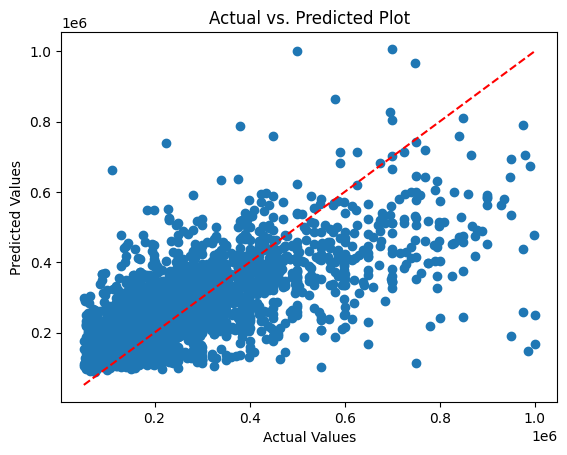

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Plot')
plt.show()

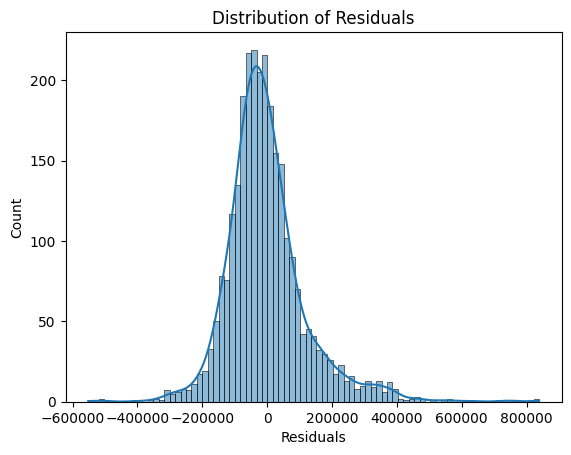

In [ ]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


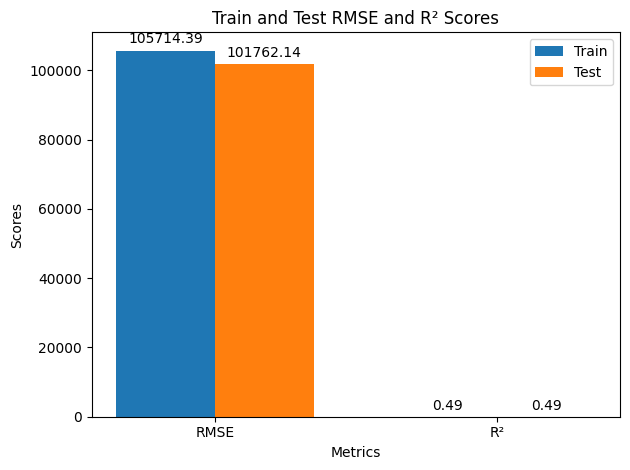

In [ ]:
import numpy as np
metrics = ['RMSE', 'R²']
train_scores = [train_rmse, train_r2]
test_scores = [test_rmse, test_r2]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Train and Test RMSE and R² Scores')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


,price,bed,bath,acre_lot,house_size
1414374,524900.0,3.0,2.0,0.09,2200.0
1414376,90000.0,3.0,2.0,0.08,1421.0
1414378,168000.0,6.0,4.0,0.05,3422.0
1414379,200000.0,3.0,1.0,4.98,580.0
1414380,380000.0,2.0,2.0,0.19,1210.0


Training RMSE: 193844.77211898708
Testing RMSE: 213082.57637414156
Training R^2: 0.16446958526421995
Testing R^2: -0.005799242947490679
